<a href="https://colab.research.google.com/github/dipika77/Dog-vs-cat-classifier/blob/main/Dog_vs_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:31<00:00, 45.1MB/s]
100% 1.06G/1.06G [00:31<00:00, 36.3MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [8]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
# Create CNN model

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid' ))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid' ))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid' ))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 135ms/step - accuracy: 0.5769 - loss: 1.9966 - val_accuracy: 0.7074 - val_loss: 0.5773
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 139ms/step - accuracy: 0.7188 - loss: 0.5527 - val_accuracy: 0.7234 - val_loss: 0.6541
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 122ms/step - accuracy: 0.7844 - loss: 0.4590 - val_accuracy: 0.8363 - val_loss: 0.3748
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 137ms/step - accuracy: 0.8153 - loss: 0.4160 - val_accuracy: 0.8423 - val_loss: 0.3453
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 114ms/step - accuracy: 0.8584 - loss: 0.3291 - val_accuracy: 0.8787 - val_loss: 0.3051
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.8868 - loss: 0.2651 - val_accuracy: 0.8913 - val_loss: 0.2666
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 135ms/step - accuracy: 0.9253 - loss: 0.1864 - val_accuracy: 0.9432 - val_loss: 0.1460
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 114ms/step - accuracy: 0.9476 - loss

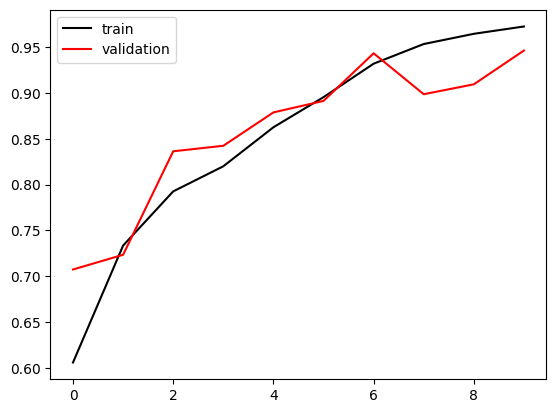

In [13]:
# To see what our train test graph looks like

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'black', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'validation')
plt.legend()
plt.show()

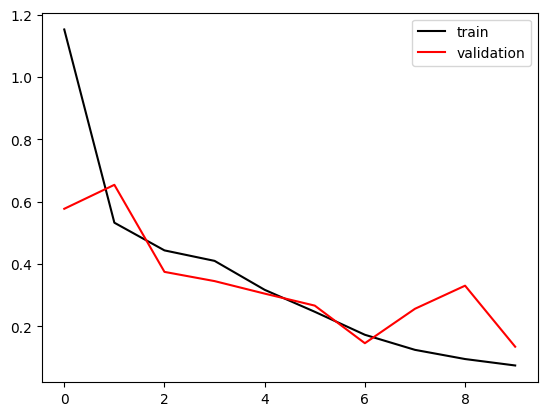

In [14]:
plt.plot(history.history['loss'], color = 'black', label = 'train')
plt.plot(history.history['val_loss'], color = 'red', label = 'validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [16]:
test_img = cv2.imread('/content/dog.jpg')

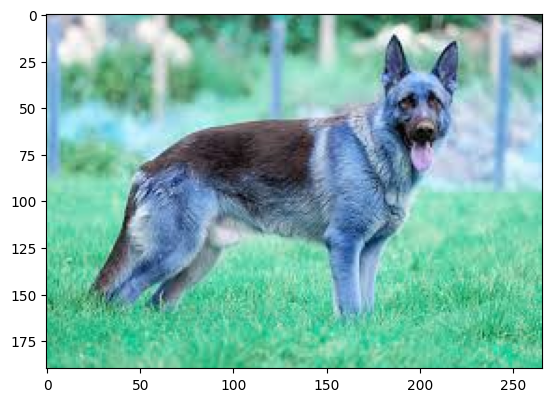

In [17]:
plt.imshow(test_img)

In [18]:
test_img.shape

(190, 266, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

In [22]:
test_input = test_img.reshape(1,256,256,3)

In [23]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [25]:
test_img1 = cv2.imread('/content/cat.jpg')

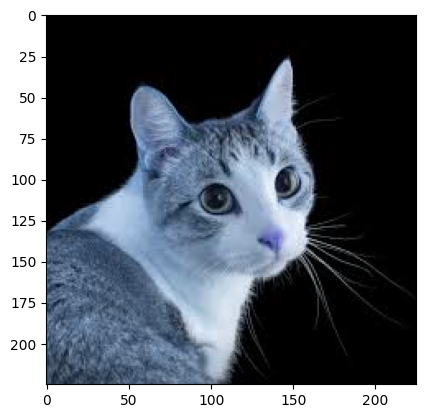

In [26]:
plt.imshow(test_img1)

In [27]:
test_img1.shape

(225, 225, 3)

In [29]:
test_img1 = cv2.resize(test_img1,(256,256))

In [33]:
test_input1 = test_img1.reshape((1,256,256,3))

In [34]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)